In [2]:
# Basics

import pandas as pd
import numpy as np

# Visualization 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Sampling // Classifer // Metrics 

import sklearn
from sklearn.linear_model import LinearRegression


In [3]:
location = "../daBootcamp/dataSets/googlePlayStorexlsx.xlsx"

df = pd.read_excel(location)

df.head(5)

,App,Category,Rating,Reviews,SizeMB,Installations,Paid,Price$,Content Rating,LastUp,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,0,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite ƒ?? FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0,0.0,Teen,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,Everyone,2018-06-20,1.1,4.4 and up


In [3]:
## what do my numeric variables look like?

df.describe()

,Rating,Reviews,SizeMB,Installations,Paid,Price$
count,9143.000000,9.143000e+03,9143.000000,9.143000e+03,9143.000000,9143.000000
mean,3.527901,2.491031e+05,21.520263,7.116393e+06,0.079186,1.184625
std,1.590539,1.716394e+06,22.589790,4.619850e+07,0.270044,17.357643
min,0.000000,0.000000e+00,0.008500,0.000000e+00,0.000000,0.000000
25%,3.600000,2.200000e+01,4.900000,1.000000e+03,0.000000,0.000000
50%,4.200000,7.420000e+02,13.000000,1.000000e+05,0.000000,0.000000
75%,4.500000,2.506550e+04,30.000000,1.000000e+06,0.000000,0.000000
max,5.000000,4.489389e+07,100.000000,1.000000e+09,1.000000,400.000000


In [4]:
# number of rows and number of columns
df.shape

(9143, 12)

In [7]:
#column names?

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'SizeMB', 'Installations',
       'Paid', 'Price$', 'Content Rating', 'LastUp', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
#find columns that have missing values

df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
SizeMB            0
Installations     0
Paid              0
Price$            0
Content Rating    0
LastUp            0
Current Ver       8
Android Ver       2
dtype: int64

In [6]:
#Remove null values from the dateset

removeNulls= df.dropna()
removeNulls.shape

removeNulls.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
SizeMB            0
Installations     0
Paid              0
Price$            0
Content Rating    0
LastUp            0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
# let's focus only on the variables we want for the analyses

modeldf = removeNulls.drop(['Category','SizeMB','LastUp','Paid','Current Ver', 'Android Ver'], axis=1)
modeldf.columns
modeldf.head()

,App,Rating,Reviews,Installations,Price$,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,10000,0.0,Everyone
1,Coloring book moana,3.9,967,500000,0.0,Everyone
2,"U Launcher Lite ƒ?? FREE Live Cool Themes, Hid...",4.7,87510,5000000,0.0,Everyone
3,Sketch - Draw & Paint,4.5,215644,50000000,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,4.3,967,100000,0.0,Everyone


In [14]:
#dummy variables for 'Content Rating'
modeldf = pd.get_dummies(data=modeldf, columns=['Content Rating'])
modeldf.head()


,App,Rating,Reviews,Installations,Price$,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,10000,0.0,0,1,0,0,0
1,Coloring book moana,3.9,967,500000,0.0,0,1,0,0,0
2,"U Launcher Lite ƒ?? FREE Live Cool Themes, Hid...",4.7,87510,5000000,0.0,0,1,0,0,0
3,Sketch - Draw & Paint,4.5,215644,50000000,0.0,0,0,0,0,1
4,Pixel Draw - Number Art Coloring Book,4.3,967,100000,0.0,0,1,0,0,0


# Multiple linear regression

In [8]:
# Create a dateset which have only numerical value for the purposes of the analysis
numdf = modeldf._get_numeric_data()

# Create a new dataset which has only independent variables, remove Installations, because Installations is 
# a dependent variable
x = numdf.drop(['Installations'], axis = 1)

In [9]:
model = LinearRegression()

# Variable X is everything in the dataset, that is not the dependent variable (the Installations)
model.fit(x, numdf.Installations)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
correlationCoeff= model.score(x,numdf.Installations)
print('Coefficient of correlation:', correlationCoeff )


Coefficient of correlation: 0.3947333487381841


# Simple linear regression

In [14]:
# Is required to be two-dimensional, or to be more precise,
# to have one column and as many rows as necessary
linearModel = LinearRegression()

linearModel.fit(numdf.Reviews.values.reshape((-1,1)), numdf.Installations)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
simpleCorrCoeff= model.score(x,numdf.Installations)
print('Coefficient of correlation:', simpleCorrCoeff )

Coefficient of correlation: 0.3947333487381841


# Randomize train and test data

In [26]:
#test_size  = 0.33
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, numdf.Installations, test_size=0.33, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6119, 3)
(3014, 3)
(6119,)
(3014,)


In [27]:
# fit a model
lm = LinearRegression()
fitModel = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

predictions

array([3.73549196e+06, 5.85142061e+04, 3.97252235e+06, ...,
       2.87458112e+06, 7.66138076e+07, 5.85893031e+04])

In [ ]:
# Plot the model

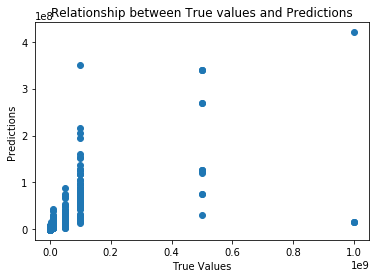

In [30]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Relationship between True values and Predictions') 
plt.show()
         